In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from skimage import exposure
import helpers

In [2]:
labeled_data = !ls labeled/*.npy

In [3]:
df = pd.DataFrame()
for d in labeled_data:
    data = np.load(d)
    # make index
#     i = d.split('.')[2]
    no_nans_data = data[~np.isnan(data)]
    row = pd.DataFrame(dict(pd.value_counts(no_nans_data)/no_nans_data.shape[0]), index=[d])
    df = pd.concat([df, row])

In [4]:
df.shape

(523, 3)

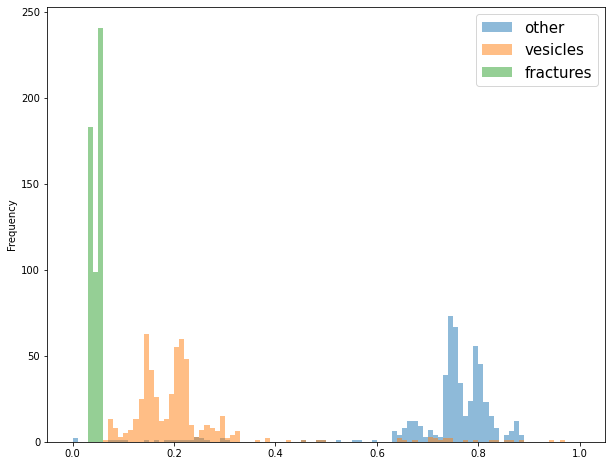

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

df[0.0].plot.hist(bins=np.linspace(0, 1, 101), alpha=0.5, ax=ax)
df[1.0].plot.hist(bins=np.linspace(0, 1, 101), alpha=0.5, ax=ax)
df[2.0].plot.hist(bins=np.linspace(0, 1, 101), alpha=0.5, ax=ax)

ax.legend(['other', 'vesicles', 'fractures'], fontsize=15)

In [6]:
df[df[1.0].between(0.4, 0.6)]

0.0       1.0  \
labeled/6um_jamtveit_att_pag-1.99_3.12_00141.ti...  0.481372  0.481777   
labeled/6um_jamtveit_att_pag-1.99_3.12_00322.ti...  0.522375  0.423156   
labeled/6um_jamtveit_att_pag-1.99_3.12_00494.ti...  0.454802  0.491356   
labeled/6um_jamtveit_att_pag-1.99_3.12_00512.ti...  0.491570  0.456445   

                                                         2.0  
labeled/6um_jamtveit_att_pag-1.99_3.12_00141.ti...  0.036851  
labeled/6um_jamtveit_att_pag-1.99_3.12_00322.ti...  0.054469  
labeled/6um_jamtveit_att_pag-1.99_3.12_00494.ti...  0.053843  
labeled/6um_jamtveit_att_pag-1.99_3.12_00512.ti...  0.051984

In [7]:
df[df[1.0].between(0.18, 0.22)]

0.0       1.0  \
labeled/6um_jamtveit_att_pag-1.99_3.12_00000.ti...  0.750231  0.201334   
labeled/6um_jamtveit_att_pag-1.99_3.12_00002.ti...  0.763396  0.185671   
labeled/6um_jamtveit_att_pag-1.99_3.12_00003.ti...  0.757621  0.194831   
labeled/6um_jamtveit_att_pag-1.99_3.12_00005.ti...  0.753429  0.203419   
labeled/6um_jamtveit_att_pag-1.99_3.12_00006.ti...  0.753894  0.204117   
...                                                      ...       ...   
labeled/6um_jamtveit_att_pag-1.99_3.12_00299.ti...  0.761406  0.183260   
labeled/6um_jamtveit_att_pag-1.99_3.12_00305.ti...  0.753784  0.190487   
labeled/6um_jamtveit_att_pag-1.99_3.12_00306.ti...  0.757426  0.187031   
labeled/6um_jamtveit_att_pag-1.99_3.12_00309.ti...  0.761900  0.183008   
labeled/6um_jamtveit_att_pag-1.99_3.12_00511.ti...  0.743983  0.203918   

                                                         2.0  
labeled/6um_jamtveit_att_pag-1.99_3.12_00000.ti...  0.048434  
labeled/6um_jamtveit_att_pag-1.99_3.12_00002.ti...  0.050933  
labeled/6um_jamtveit_att_pag-1.99_3.12_00003.ti...  0.047548  
labeled/6um_jamtveit_att_pag-1.99_3.12_00005.ti...  0.043152  
labeled/6um_jamtveit_att_pag-1.99_3.12_00006.ti...  0.041989  
...                                                      ...  
labeled/6um_jamtveit_att_pag-1.99_3.12_00299.ti...  0.055334  
labeled/6um_jamtveit_att_pag-1.99_3.12_00305.ti...  0.055729  
labeled/6um_jamtveit_att_pag-1.99_3.12_00306.ti...  0.055542  
labeled/6um_jamtveit_att_pag-1.99_3.12_00309.ti...  0.055092  
labeled/6um_jamtveit_att_pag-1.99_3.12_00511.ti...  0.052099  

[156 rows x 3 columns]

In [8]:
df[df[1.0].between(0.0, 0.3)]

0.0       1.0  \
labeled/6um_jamtveit_att_pag-1.99_3.12_00000.ti...  0.750231  0.201334   
labeled/6um_jamtveit_att_pag-1.99_3.12_00001.ti...  0.667650  0.290716   
labeled/6um_jamtveit_att_pag-1.99_3.12_00002.ti...  0.763396  0.185671   
labeled/6um_jamtveit_att_pag-1.99_3.12_00003.ti...  0.757621  0.194831   
labeled/6um_jamtveit_att_pag-1.99_3.12_00004.ti...  0.671288  0.283437   
...                                                      ...       ...   
labeled/6um_jamtveit_att_pag-1.99_3.12_00518.ti...  0.819068  0.128660   
labeled/6um_jamtveit_att_pag-1.99_3.12_00519.ti...  0.815254  0.132859   
labeled/6um_jamtveit_att_pag-1.99_3.12_00520.ti...  0.817633  0.130604   
labeled/6um_jamtveit_att_pag-1.99_3.12_00521.ti...  0.831073  0.116659   
labeled/6um_jamtveit_att_pag-1.99_3.12_00522.ti...  0.815732  0.131665   

                                                         2.0  
labeled/6um_jamtveit_att_pag-1.99_3.12_00000.ti...  0.048434  
labeled/6um_jamtveit_att_pag-1.99_3.12_00001.ti...  0.041634  
labeled/6um_jamtveit_att_pag-1.99_3.12_00002.ti...  0.050933  
labeled/6um_jamtveit_att_pag-1.99_3.12_00003.ti...  0.047548  
labeled/6um_jamtveit_att_pag-1.99_3.12_00004.ti...  0.045276  
...                                                      ...  
labeled/6um_jamtveit_att_pag-1.99_3.12_00518.ti...  0.052272  
labeled/6um_jamtveit_att_pag-1.99_3.12_00519.ti...  0.051886  
labeled/6um_jamtveit_att_pag-1.99_3.12_00520.ti...  0.051763  
labeled/6um_jamtveit_att_pag-1.99_3.12_00521.ti...  0.052268  
labeled/6um_jamtveit_att_pag-1.99_3.12_00522.ti...  0.052602  

[481 rows x 3 columns]

In [9]:
df.shape

(523, 3)

In [10]:
df[1.0].describe()

count    523.000000
mean       0.216933
std        0.132886
min        0.067507
25%        0.149351
50%        0.201334
75%        0.222509
max        0.962847
Name: 1.0, dtype: float64

In [11]:
df[df[1.0]> 0.85]

0.0       1.0  \
labeled/6um_jamtveit_att_pag-1.99_3.12_00113.ti...  0.095790  0.866561   
labeled/6um_jamtveit_att_pag-1.99_3.12_00166.ti...  0.000007  0.962847   
labeled/6um_jamtveit_att_pag-1.99_3.12_00167.ti...  0.075773  0.887061   
labeled/6um_jamtveit_att_pag-1.99_3.12_00373.ti...  0.089753  0.855863   
labeled/6um_jamtveit_att_pag-1.99_3.12_00493.ti...  0.000074  0.946085   

                                                         2.0  
labeled/6um_jamtveit_att_pag-1.99_3.12_00113.ti...  0.037649  
labeled/6um_jamtveit_att_pag-1.99_3.12_00166.ti...  0.037146  
labeled/6um_jamtveit_att_pag-1.99_3.12_00167.ti...  0.037167  
labeled/6um_jamtveit_att_pag-1.99_3.12_00373.ti...  0.054384  
labeled/6um_jamtveit_att_pag-1.99_3.12_00493.ti...  0.053841

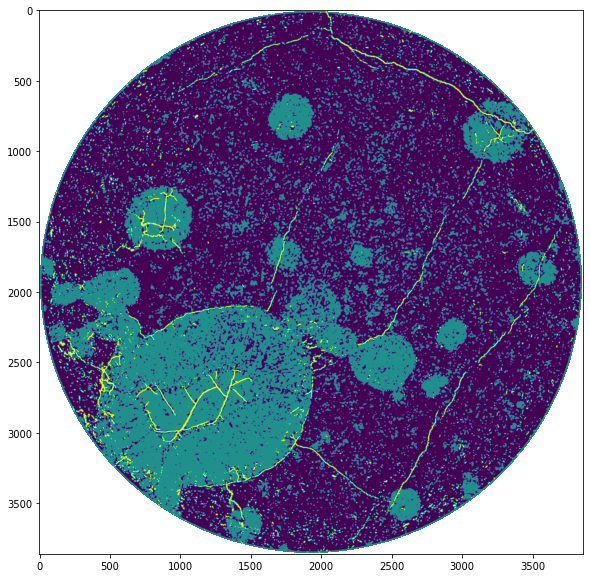

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(np.load('labeled/6um_jamtveit_att_pag-1.99_3.12_00001.tif_labeled.npy'))

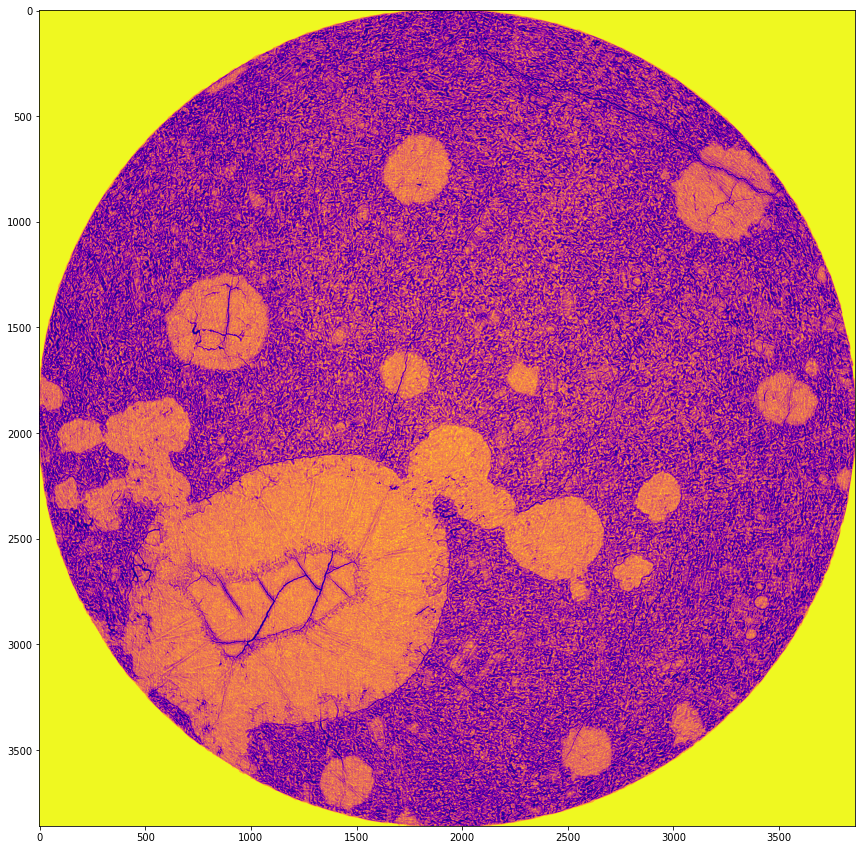

In [14]:


filename = 'benoitdata/F20_10_b//6um_jamtveit_att_pag-1.99_3.12_00001.tif'

img = cv2.imread(filename,0)

norm_img = helpers.fix_brightness(img)
imarr_hist1 = exposure.equalize_hist(norm_img)


fig, ax = plt.subplots(figsize=(15, 15))

ax.imshow(imarr_hist1, cmap='plasma')

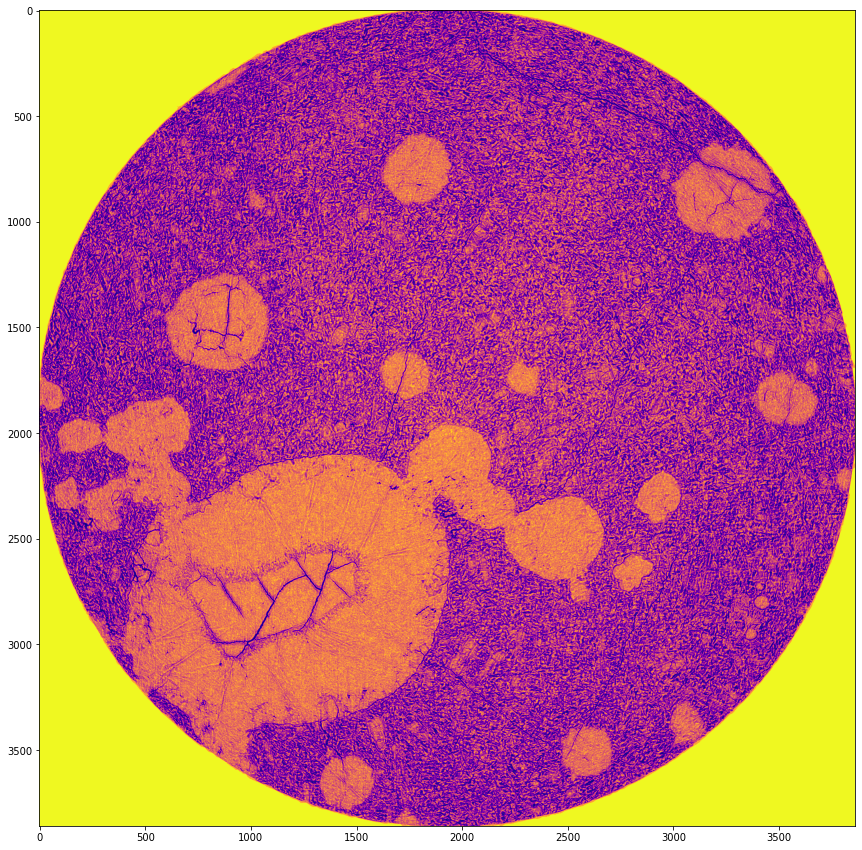

In [15]:



filename = 'benoitdata/F20_10_b//6um_jamtveit_att_pag-1.99_3.12_00000.tif'

img = cv2.imread(filename,0)

norm_img = helpers.fix_brightness(img)
imarr_hist2 = exposure.equalize_hist(norm_img)


fig, ax = plt.subplots(figsize=(15, 15))

ax.imshow(imarr_hist2, cmap='plasma')
# ax.imshow(norm_img, cmap='plasma')

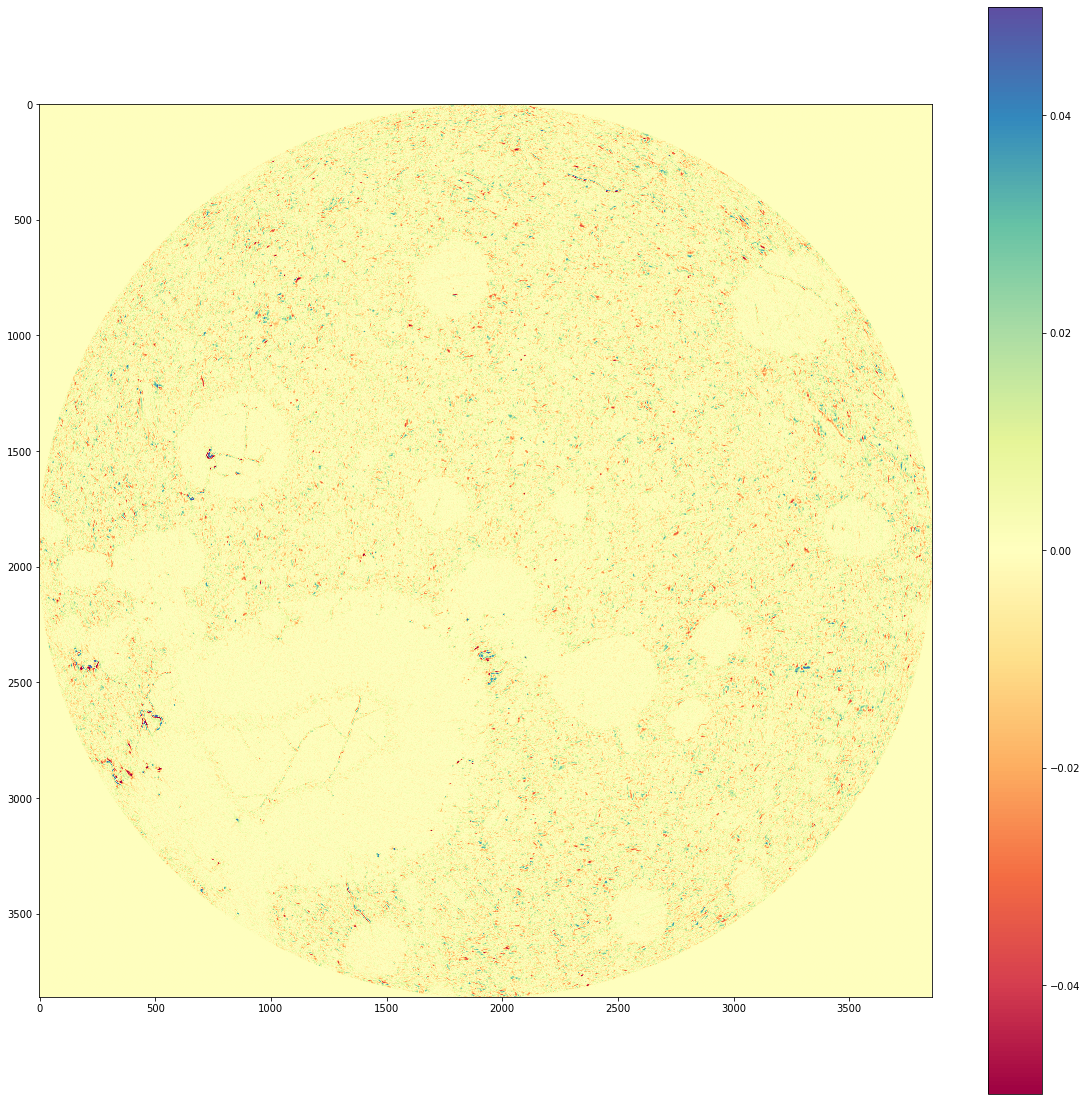

In [16]:
fig, ax = plt.subplots(figsize=(20, 20))

filename = 'benoitdata/F20_10_b//6um_jamtveit_att_pag-1.99_3.12_00001.tif'

img1 = cv2.imread(filename,0)
img1 = img1/255.

filename = 'benoitdata/F20_10_b//6um_jamtveit_att_pag-1.99_3.12_00000.tif'

img2 = cv2.imread(filename,0)
img2 = img2/255.

# cbar = ax.imshow(imarr_hist1 - imarr_hist2, cmap='Spectral', vmin=-0.2, vmax=0.2)
cbar = ax.imshow(img1 - img2, cmap='Spectral', vmin=-0.05, vmax=0.05)
fig.colorbar(cbar)

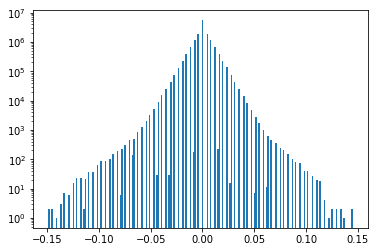

In [17]:
plt.hist((img1 - img2).flatten(), bins=200)
plt.yscale('log')

In [18]:
(imarr_hist1 - imarr_hist2).flatten().shape

(14891881,)

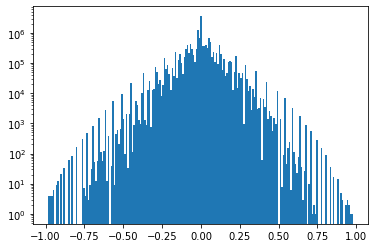

In [19]:
plt.hist((imarr_hist1 - imarr_hist2).flatten(), bins=200)
plt.yscale('log')

In [ ]:
# data[~np.isnan(data)].shape

In [ ]:
# data.shape[0] * data.shape[1]

In [ ]:
# no_nans_data = data[~np.isnan(data)]
# dict(pd.value_counts(no_nans_data)/no_nans_data.shape[0])

In [ ]:
# plt.imshow(data)

In [ ]:
# data.flatten()